In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.testing as tm

In [2]:
#ML Packages
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression



In [3]:
#load dataset
data = pd.read_csv("international_matches.csv")
turnamen_pilihan = ['FIFA World Cup', 'UEFA Euro', 'AFF Championship', 'Friendly']


In [4]:
data.describe()


,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


In [5]:
data.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.shape

(23921, 25)

In [7]:
data.dtypes

date                              object
home_team                         object
away_team                         object
home_team_continent               object
away_team_continent               object
home_team_fifa_rank                int64
away_team_fifa_rank                int64
home_team_total_fifa_points        int64
away_team_total_fifa_points        int64
home_team_score                    int64
away_team_score                    int64
tournament                        object
city                              object
country                           object
neutral_location                    bool
shoot_out                         object
home_team_result                  object
home_team_goalkeeper_score       float64
away_team_goalkeeper_score       float64
home_team_mean_defense_score     float64
home_team_mean_offense_score     float64
home_team_mean_midfield_score    float64
away_team_mean_defense_score     float64
away_team_mean_offense_score     float64
away_team_mean_m

In [8]:
pd.to_datetime(data.date).head()
data['date_time'] = pd.to_datetime(data.date)
data.dtypes
data.date_time.dt.year.value_counts()
data.date_time.dt.year.value_counts().sort_index().head()


1993    171
1994    494
1995    564
1996    781
1997    797
Name: date_time, dtype: int64

<AxesSubplot: >

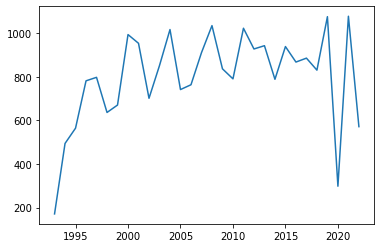

In [9]:
data.date_time.dt.year.value_counts().sort_index().plot()

In [10]:
#jumlah pertandingan berdasarkan skore
data['match_goals'] = data.home_team_score + data.away_team_score
data[['home_team_score', 'away_team_score','match_goals']].sample(5)



,home_team_score,away_team_score,match_goals
15346,2,1,3
17427,1,2,3
7877,1,0,1
5538,3,3,6
283,1,0,1


In [11]:
# jumlah pertandingan berdasarkan turnamen
data.tournament.value_counts()


Friendly                                8558
FIFA World Cup qualification            5528
UEFA Euro qualification                 1723
African Cup of Nations qualification    1274
AFC Asian Cup qualification              541
                                        ... 
Copa América qualification                 2
Cup of Ancient Civilizations               2
CONMEBOL–UEFA Cup of Champions             1
TIFOCO Tournament                          1
Copa Confraternidad                        1
Name: tournament, Length: 82, dtype: int64

In [12]:
# turnamen dengan jumlah pertandingan
hitung_tournament = data.tournament.value_counts().head(10)
hitung_tournament

Friendly                                8558
FIFA World Cup qualification            5528
UEFA Euro qualification                 1723
African Cup of Nations qualification    1274
AFC Asian Cup qualification              541
African Cup of Nations                   490
FIFA World Cup                           432
UEFA Nations League                      415
COSAFA Cup                               309
CECAFA Cup                               308
Name: tournament, dtype: int64

<AxesSubplot: xlabel='tournament'>

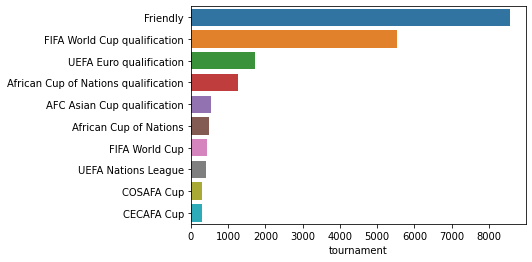

In [13]:
# turnamen dengan jumlah pertandingan
sns.barplot(y=hitung_tournament.index, x=hitung_tournament)


In [14]:
#turnamen dengan pertandingan lebih dari 1000
turnamen_top = hitung_tournament[hitung_tournament >= 1000].index
turnamen_top


Index(['Friendly', 'FIFA World Cup qualification', 'UEFA Euro qualification',
       'African Cup of Nations qualification'],
      dtype='object')

In [15]:
# rata-rata pertandingan
rerata_event = data[data.tournament.isin(turnamen_top)]
rerata_event.shape



(17083, 27)

In [16]:
# rata-rata pertandingan
rerata_event.groupby('tournament').match_goals.agg(['count', 'mean']).sort_values('mean').tail(10)


,count,mean
tournament,,
African Cup of Nations qualification,1274,2.367347
Friendly,8558,2.511334
UEFA Euro qualification,1723,2.791642
FIFA World Cup qualification,5528,2.871744


In [17]:
#jumlah pertandingan

data[data.date_time.dt.year >= 2015].groupby(data.date_time.dt.year).tournament.value_counts().unstack().fillna(0)


tournament,ABCS Tournament,AFC Asian Cup,AFC Asian Cup qualification,AFC Challenge Cup,AFF Championship,AFF Championship qualification,African Cup of Nations,African Cup of Nations qualification,African Nations Championship,African Nations Championship qualification,...,Pacific Games,Pacific Mini Games,SAFF Cup,Superclásico de las Américas,Three Nations Cup,UEFA Euro,UEFA Euro qualification,UEFA Nations League,UNCAF Cup,Windward Islands Tournament
date_time,,,,,,,,,,,,,,,,,,,,,
2015,2.0,32.0,0.0,0.0,0.0,0.0,32.0,45.0,40.0,0.0,...,0.0,0.0,11.0,0.0,0.0,0.0,158.0,0.0,0.0,3.0
2016,0.0,0.0,14.0,13.0,24.0,0.0,0.0,87.0,32.0,0.0,...,0.0,0.0,1.0,0.0,0.0,51.0,0.0,0.0,0.0,0.0
2017,0.0,0.0,58.0,0.0,0.0,0.0,32.0,28.0,48.0,0.0,...,0.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,6.0
2018,0.0,0.0,13.0,0.0,26.0,2.0,0.0,46.0,32.0,0.0,...,0.0,0.0,12.0,1.0,0.0,0.0,0.0,138.0,0.0,0.0
2019,0.0,51.0,0.0,0.0,0.0,0.0,52.0,68.0,0.0,64.0,...,17.0,0.0,0.0,1.0,0.0,0.0,250.0,4.0,0.0,0.0
2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,162.0,0.0,0.0
2021,0.0,0.0,4.0,0.0,0.0,0.0,0.0,47.0,0.0,0.0,...,0.0,0.0,11.0,0.0,3.0,51.0,0.0,4.0,0.0,0.0
2022,0.0,0.0,36.0,0.0,0.0,0.0,52.0,54.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.0,0.0,0.0


In [18]:
#jumlah pertandingan
data_5_tahun = data[data.date_time.dt.year >= 2015].groupby(data.date_time.dt.year).tournament.value_counts().unstack().fillna(0)
data_5_tahun[turnamen_pilihan]


tournament,FIFA World Cup,UEFA Euro,AFF Championship,Friendly
date_time,,,,
2015,0.0,0.0,0.0,270.0
2016,0.0,51.0,24.0,276.0
2017,0.0,0.0,0.0,284.0
2018,64.0,0.0,26.0,412.0
2019,0.0,0.0,0.0,235.0
2020,0.0,0.0,0.0,103.0
2021,0.0,51.0,0.0,215.0
2022,0.0,0.0,0.0,168.0


In [19]:
jumlah_pertadingan = data[data.tournament == 'FIFA World Cup'].groupby(
    data.date_time.dt.year).tournament.value_counts().unstack()
jumlah_pertadingan.tail(10)


tournament,FIFA World Cup
date_time,
1994,52
1998,60
2002,64
2006,64
2010,64
2014,64
2018,64


<AxesSubplot: xlabel='date_time'>

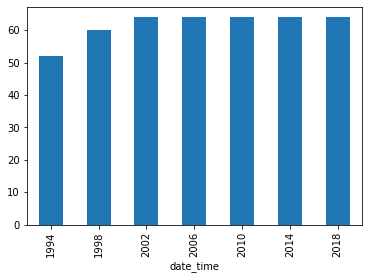

In [20]:
jumlah_pertadingan['FIFA World Cup'].plot(kind='bar')


In [21]:
max_hosted_country_df = data.country.value_counts().head(10)
max_hosted_country_df = pd.DataFrame(max_hosted_country_df)
max_hosted_country_df.reset_index(inplace=True)
max_hosted_country_df = max_hosted_country_df.rename(
    columns={'index': 'Countries', 'country': 'Total_Matches_Hosted'})
max_hosted_country_df


,Countries,Total_Matches_Hosted
0,USA,1003
1,South Africa,505
2,United Arab Emirates,462
3,Qatar,461
4,France,445
5,Germany,285
6,Thailand,280
7,Saudi Arabia,280
8,England,277
9,Japan,277


<BarContainer object of 10 artists>

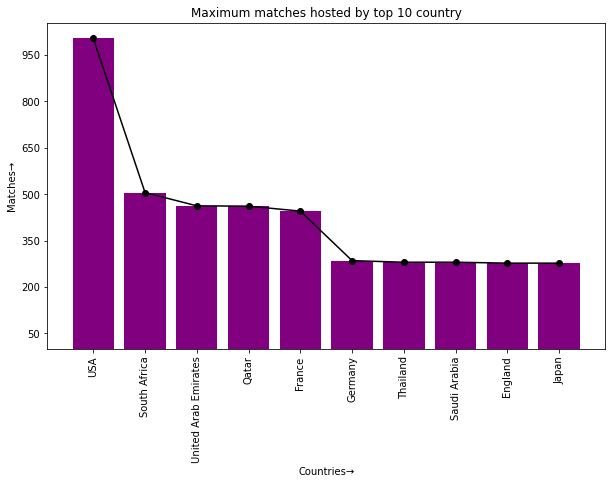

In [22]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.title("Maximum matches hosted by top 10 country")
plt.yticks(ticks=np.arange(50, 1400, 150))
plt.xticks(rotation=90)
plt.xlabel('Countries→')
plt.ylabel('Matches→')
plt.plot(max_hosted_country_df.Countries,
         max_hosted_country_df["Total_Matches_Hosted"], marker='o', color='black')
plt.bar(max_hosted_country_df.Countries,
        max_hosted_country_df["Total_Matches_Hosted"], color="PURPLE")


In [23]:
# gol terbanyak
gol_terbanyak = data['home_team_score'].max()
besar = data[data['home_team_score'] == gol_terbanyak][[
    'date', 'home_team', 'away_team', 'home_team_score', 'away_team_score','tournament']]
besar


,date,home_team,away_team,home_team_score,away_team_score,tournament
5410,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification


In [24]:
#logistic Regression
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, confusion_matrix
logistic_model = LogisticRegression(random_state=0)


In [25]:

import pickle
Pkl_Filename = "socc.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(logistic_model, file)


In [26]:
#load back
with open(Pkl_Filename, 'rb') as file:
    Pickled_LR_Model = pickle.load(file)
Pickled_LR_Model


LogisticRegression(random_state=0)